# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Молодец, что начинаешь проект с описания.

### Откройте файл с данными и изучите общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around_3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around_3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]]

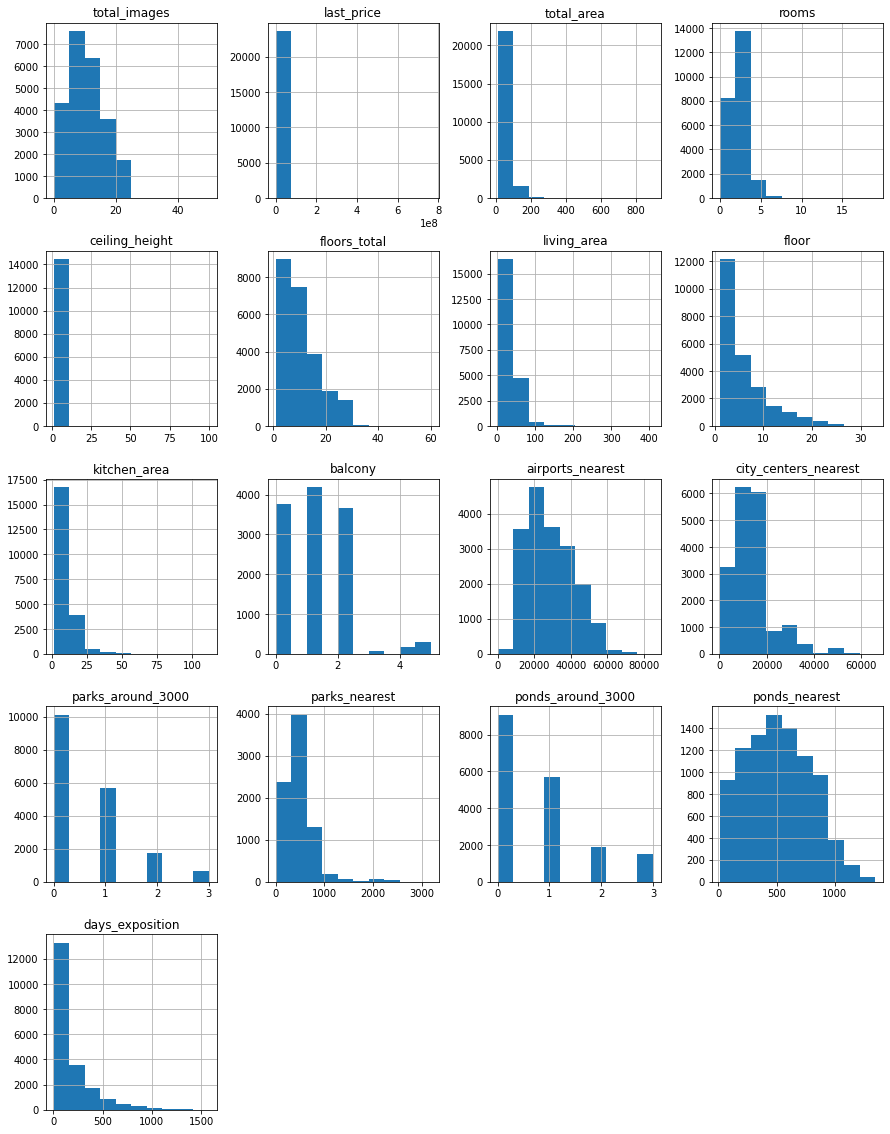

In [1]:
import pandas as pd
import matplotlib.pyplot
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest', 'parks_around3000' : 'parks_around_3000', 'ponds_around3000' : 'ponds_around_3000'}, inplace=True)
data.info()
display(data.head())
data.hist(figsize=(15, 20))


### Предобработка данных

In [2]:
data['balcony'] = data['balcony'].fillna(0).astype('int')
# Высота потолков не сильно отличается, так что заменим пропуски на среднее значение
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())
# В столбце с датой публикации оставим только дату, т.к. время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
# В столбце is_apartment можем посчитать, что пропуски означают, что это не апартаменты и присвоить False
data['is_apartment'] = data['is_apartment'].fillna(False)
# Пропуски в столбце living_area заменим на среднее отношение жилплощади к общей площади
living_area_mean = (data['living_area']/data['total_area']).mean()
data['living_area'] = data['living_area'].fillna(value=(living_area_mean * data['total_area']))
# Пропуски значений площади кухни тоже заменим на среднее отношение площади кухонь к общей площади
kitchen_area_mean = ((data['kitchen_area'] / data['total_area']).mean())
data['kitchen_area'] = data['kitchen_area'].fillna(value= (kitchen_area_mean * data['total_area']))
display(data)
print(data.isnull().sum())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.700000,16.0,51.000000,8,False,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.771499,11.0,18.600000,1,False,...,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.771499,5.0,34.300000,4,False,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.771499,14.0,89.797718,9,False,...,29.789403,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14.0,32.000000,13,False,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.700000,5.0,73.300000,3,False,...,13.830000,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.771499,5.0,38.000000,4,False,...,8.500000,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.771499,3.0,29.700000,1,False,...,10.623014,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.000000,17.0,43.345754,12,False,...,23.300000,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


 Пропуски в столбце "balcony" заменим на 0, т.к. в таком случае балкона там может не оказаться. В столбце названий населенного пункта также оставим пропуски, т.к. значения могли просто не заполнить. Наличие пропусков в столбцах, содержащих информацию о парках и прудах в радиусе 3 км, может быть обусловлено тем, что таковых там не имеется. Пропуски в значениях количества этажей могли возникнуть из-за того, что значения просто не указали.
 Тип данных изменили в столбцах balcony и days_exposition, а в столбце first_day_exposition оставили только дату, т.к. время не указано.

In [3]:
# В столбце с названиями населеных пунктов обнаружилось большое количество дубликатов. Чтобы их убрать, для начала переведем всё в нижний регистр,заменим "ё" на "е" и проведем некоторые операции с формулировками названий
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
print(data.duplicated().sum())

0


In [4]:

data.loc[data['ceiling_height']>=20, 'ceiling_height'] = (data['ceiling_height']>=20)/10
data.loc[data['ceiling_height']<2, 'ceiling_height'] = (data['ceiling_height']>=20).mean()
print(data['ceiling_height'].unique())
# Сначала методом unique определил выбивающиеся значения, затем слишком большие разделил на 10, а слишком маленькие заменил средним значением.

[ 2.7        2.7714989  3.03       2.5        2.67       2.56
  3.05       2.75       2.6        2.9        2.8        2.55
  3.         2.65       3.2        2.61       3.25       3.45
  2.77       2.85       2.64       2.57       4.15       3.5
  3.3        2.71       4.         2.47       2.73       2.84
  3.1        2.34       3.4        3.06       2.72       2.54
  2.51       2.78       2.76       0.         2.58       3.7
  2.52       5.2        2.87       2.66       2.59       2.
  2.45       3.6        2.92       3.11       3.13       3.8
  3.15       3.55       3.16       3.62       3.12       2.53
  2.74       2.96       2.46       5.3        5.         2.79
  2.95       4.06       2.94       3.82       3.54       3.53
  2.83       4.7        2.4        3.38       3.01       5.6
  3.65       3.9        3.18       3.35       2.3        3.57
  2.48       2.62       2.82       3.98       2.63       3.83
  3.52       3.95       3.75       2.88       3.67       3.87
  3.66       3

In [5]:
print((data['last_price']<=1000000).sum())
print((data['last_price']>50000000).sum())
print((data['last_price']>=100000000).sum())
# Всего 37 квартир стоимостью выше 100 миллионов. В таком случае это может быть и реальная стоимость. По сравнению с общим числом объявлений, это число невелико, так что оставим как есть.


245
131
37


### Посчитайте и добавьте в таблицу новые столбцы

In [6]:
# Для расчета стоимости одного квадратного метра поделим цену квартиры на общую площадь
data['price_of_meter'] = data['last_price']/data['total_area'].round()
# Добавим столбцы с днём недели, названием месяца и годом публикации объявления
import datetime
data['publication_day'] = data['first_day_exposition'].dt.dayofweek
data['publication_month'] =  data['first_day_exposition'].dt.month
data['publication_year'] = data['first_day_exposition'].dt.year
# Добавим обозначения этажа квартиры: первый, последний, другой
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['type_of_floor'] = data.apply(floor, axis = 1)
# Добавим столбец с расстоянием до центра города в км
data['city_centers_nearest_km'] = (data['city_centers_nearest']/1000).round()
display(data.head())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_of_meter,publication_day,publication_month,publication_year,type_of_floor,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16.0,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.771499,11.0,18.600000,1,False,...,NaN,0.0,NaN,81.0,83750.000000,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.771499,5.0,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14.0,89.797718,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

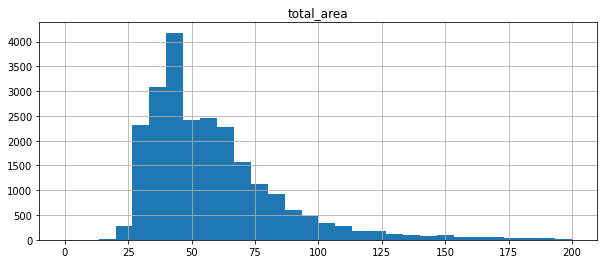

In [7]:
data.hist(column = 'total_area', bins = 30, range = (0, 200), figsize=(10,4))


Здесь видно, что больше всего квартир с площадью в районе 30 - 40 м.кв.

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

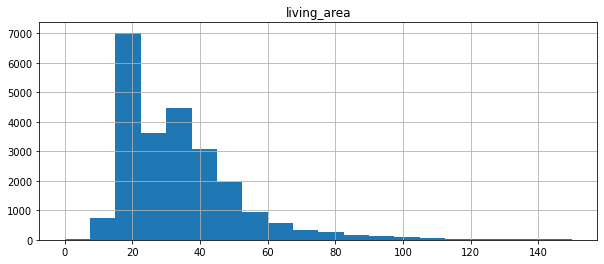

In [8]:
data.hist(column = 'living_area', bins = 20, range = (0, 150), figsize=(10,4)) 

Больше всего распространены квартиры с жилой площадью примерно 20 м.кв.

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

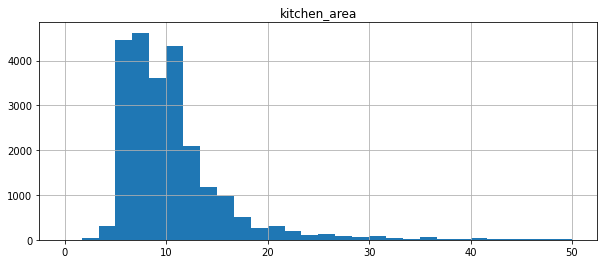

In [9]:
data.hist(column = 'kitchen_area', bins = 30, range = (0, 50), figsize=(10,4))

Преобладают квартиры с кухней 5 - 10 м.кв.

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

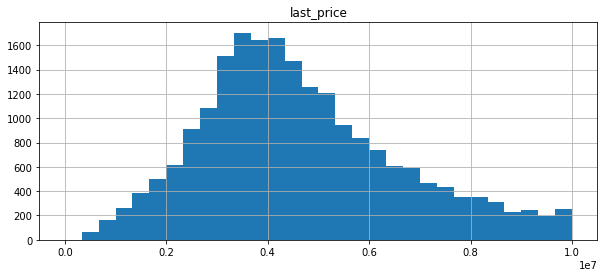

In [10]:
data.hist(column = 'last_price', bins = 30, range = (0, 10000000), figsize=(10,4))

Чаще всего встречались объявления с ценой квартиры в районе 4 млн.р.

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

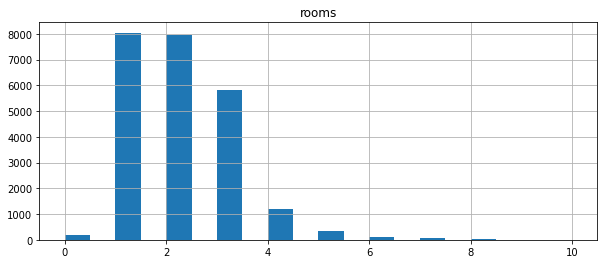

In [11]:
data.hist(column = 'rooms', bins = 20, range = (0, 10), figsize=(10,4))

Подавляющее большинство занимают одно-, двух- и трёхкомнатные квартиры

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

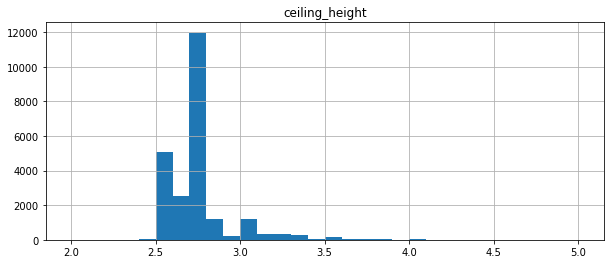

In [12]:
data.hist(column = 'ceiling_height',bins = 30, range = (2, 5), figsize=(10,4))

Больше всего квартир с высотой потолков 2.75 м, но есть и большие значения. Это могут быть какие-то промышленные или коммерческие помещения.

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

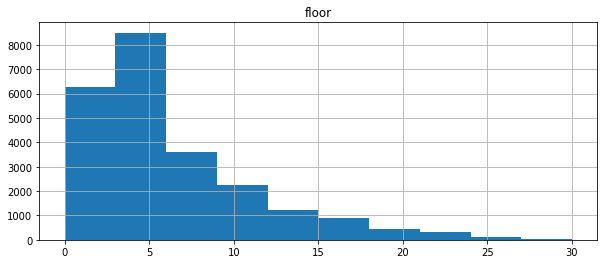

In [13]:
data.hist(column = 'floor', range = (0, 30), figsize=(10,4))

Больше всего квартир на пятом и меньших этажах

<AxesSubplot:>

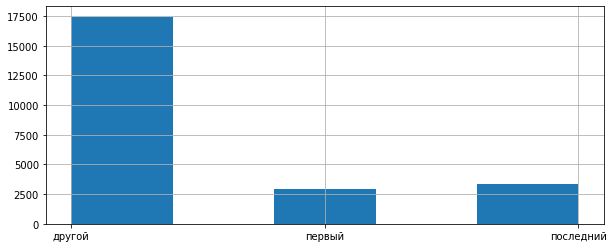

In [14]:
data['type_of_floor'].hist(bins=5, grid=True, figsize=(10,4))

Чаще всего квартиры находятся ни на первом, ни на последнем этажах

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

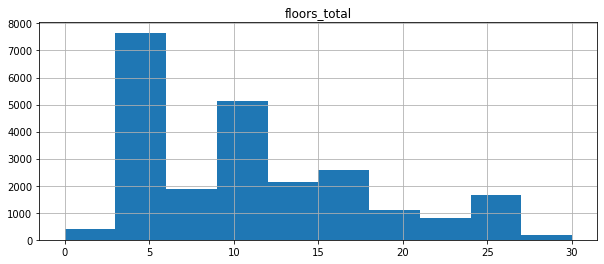

In [15]:
data.hist(column = 'floors_total', range = (0, 30), figsize=(10,4))

Больше всего домов с пятью этажами, почти в половину меньше домов имеют в районе 10 этажей

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

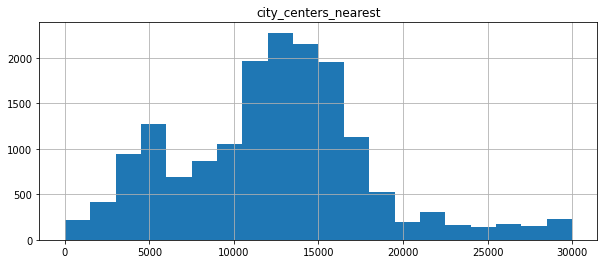

In [16]:
data.hist(column = 'city_centers_nearest', bins = 20, range = (0, 30000), figsize=(10,4))

Чаще всего жильё находится на расстоянии 12 - 15 км от центра города.

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

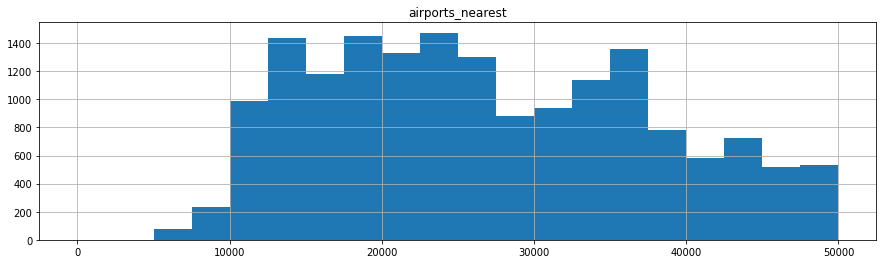

In [17]:
data.hist(column = 'airports_nearest', bins = 20, range = (0, 50000), figsize=(15,4))

Самое большое количество жилья расположено на расстоянии 12 - 25 км от аэропорта, чуть меньше на расстоянии 32 - 37 км

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

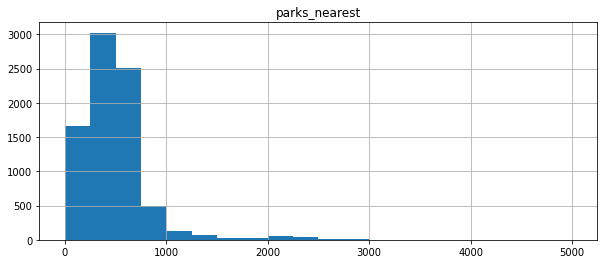

In [18]:
data.hist(column = 'parks_nearest', bins = 20, range = (0, 5000), figsize=(10,4))

В большинстве случаев расстояние до парка не превышает километра. Пик приходится на 500 метров

<AxesSubplot:ylabel='Frequency'>

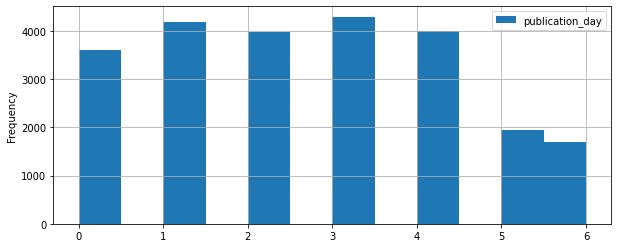

In [19]:
data.plot(kind='hist', y='publication_day', bins=12, grid=True, figsize=(10,4))

Объявления чаще выкладывались в будние дни

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

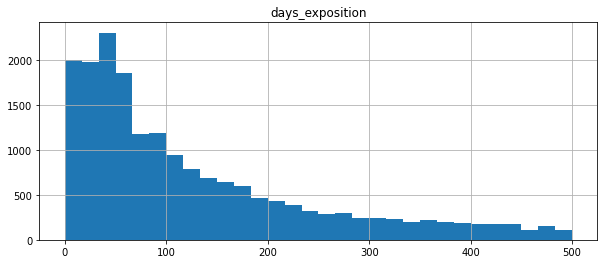

In [20]:
data.hist(column = 'days_exposition', bins = 30, range = (0, 500), figsize=(10,4))

Чаще всего квартира продавалась за срок до 50 дней, что является быстрой продажей. Более высокие значения, доходящие до 500, могут быть признаком того, что объявление забыли снять, или с жильем что-то не так. Такие продажи являются необычайно долгими.

In [21]:
print('В среднем квартиры продаются за', data['days_exposition'].mean().round(), 'дней')
print('Медианным значением является', data['days_exposition'].median(), 'дня')

В среднем квартиры продаются за 181.0 дней
Медианным значением является 95.0 дня


Коэффициент корреляции составляет 0.65


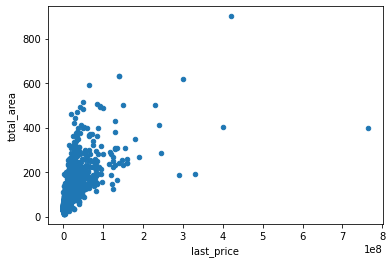

In [22]:
# Посмотрим на зависимость стоимости квартиры от общей площади
data.sort_values('last_price').plot(x='last_price', y='total_area', kind = 'scatter')
print('Коэффициент корреляции составляет', round(data['total_area'].corr(data['last_price']), 2))

Большинство точек указывавет на то, что цена напрямую зависит от общей площади. Это же подтверждается коэффициентом корреляции

Коэффициент корреляции составляет 0.59


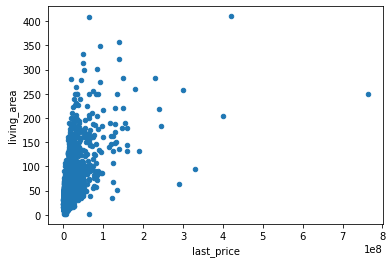

In [23]:
data.sort_values('last_price').plot(x='last_price', y='living_area', kind = 'scatter')
print('Коэффициент корреляции составляет', round(data['living_area'].corr(data['last_price']), 2))

Жилая площадь в какой-то степени связана с общей площадью, поэтому зависимость между ней и ценой тоже прямая

Коэффициент корреляции составляет 0.52


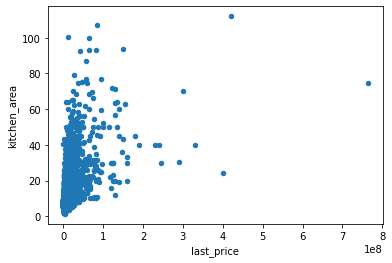

In [24]:
data.sort_values('last_price').plot(x='last_price', y='kitchen_area', kind = 'scatter')
print('Коэффициент корреляции составляет', round(data['kitchen_area'].corr(data['last_price']), 2))

Площадь кухни тоже связана с другими значениями площадей и тоже связана с ценой, но зависимость слабее. Исходя из трёх этих параметров, можно сделать вывод, что чем больше эти площади (жилая и кухни, общая указывает напрямую), тем, скорее всего, больше и само жильё, соответственно тем оно и дороже.

Коэффициент корреляции составляет 0.36


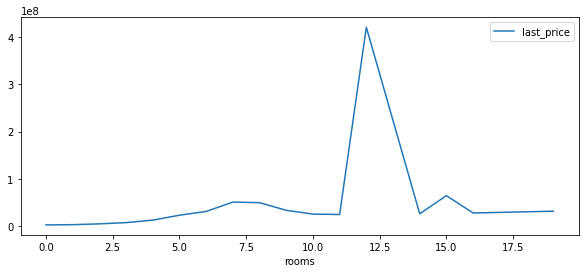

In [25]:
data.pivot_table(index='rooms', values='last_price').plot(style='-', figsize=(10,4))
print('Коэффициент корреляции составляет', round(data['rooms'].corr(data['last_price']), 2))

На графике виден прирост цены с увеличением количества комнат

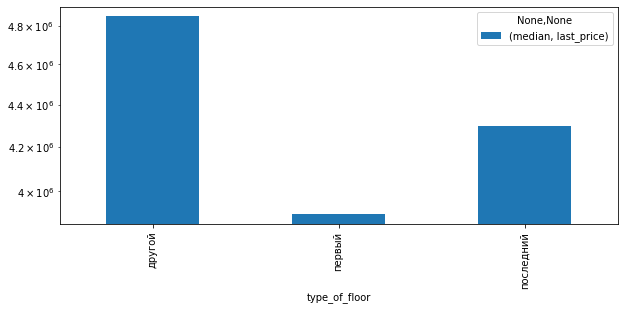

In [26]:
floor_pivot = data.pivot_table(index ='type_of_floor', values = 'last_price', aggfunc = ['median']).plot(style='-', figsize=(10,4), kind='bar', logy=True)


На графике отражены медианные цены на квартиры на разныйх этажах. Мы видим, что квартиры на первом этаже являются самыми дешевыми, дороже стоят квартиры на последних этажах, и самыми дорогими являются квартиры на других этажах

Коэффициент корреляции равен 0.0


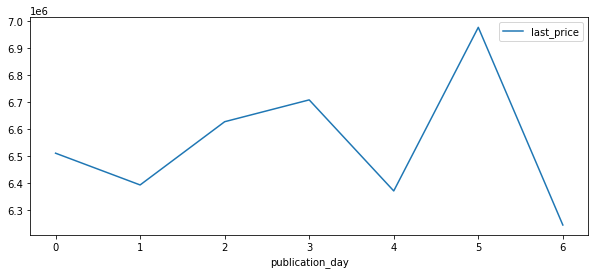

In [27]:
day_of_week_pivot = data.pivot_table(index ='publication_day', values = 'last_price').plot(style='-', figsize=(10,4))
print('Коэффициент корреляции равен', round(data['publication_day'].corr(data['last_price']), 2))

По графику видно, что самые дорогие объявления были выложены в субботу, чуть дешевле в среду - четверг. Но это нельзя считать закономерностью.

Коэффициент корреляции равен 0.0


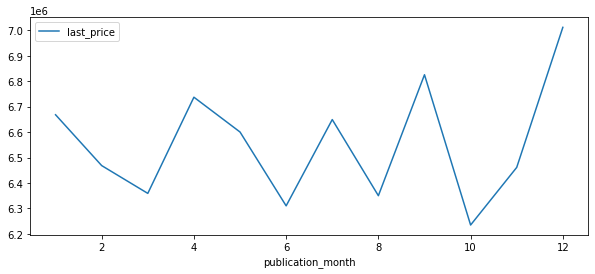

In [28]:
month_pivot = data.pivot_table(index ='publication_month', values = 'last_price').plot(style='-', figsize=(10,4))
print('Коэффициент корреляции равен', round(data['publication_month'].corr(data['last_price']), 2))

Согласно коэффициенту корреляции, связь так же отсутствует, хотя на графике заметна определенная периодичность. Пики приходятся на январь, апрель, июль, сентябрь и декабрь

Коэффициент корреляции равен -0.04


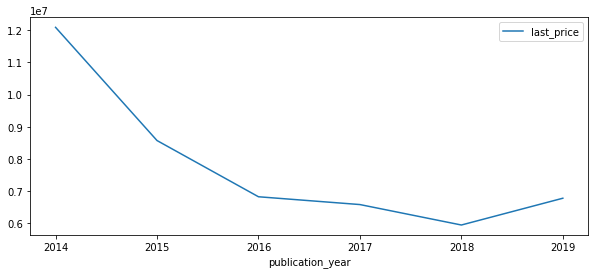

In [29]:
year_pivot = data.pivot_table(index ='publication_year', values = 'last_price').plot(style='-', figsize=(10,4))
print('Коэффициент корреляции равен', round(data['publication_year'].corr(data['last_price']), 2))

На графике виден практически плавный спад цены с каждый последующим годом, но с 2018 по 2019 наблюдается резкий подъём

In [30]:
#Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
data.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'mean', 'median']).sort_values(('count', 'last_price'), ascending=False).head(10).sort_values(('mean', 'last_price'), ascending=False)

,count,mean,median
,last_price,last_price,last_price
locality_name,,,
санкт-петербург,15721,8.062507e+06,5500000.0
пушкин,369,6.469036e+06,5180000.0
поселок парголово,327,4.488075e+06,4100000.0
деревня кудрово,299,4.234158e+06,3790000.0
поселок шушары,440,4.108082e+06,3950000.0
колпино,338,3.964021e+06,3600000.0
всеволожск,398,3.789068e+06,3450000.0
поселок мурино,556,3.652361e+06,3400000.0


Больше всего квадратный метр в среднем стоит в Санкт-Петербурге, а меньше всего в Выборге

<AxesSubplot:xlabel='city_centers_nearest_km'>

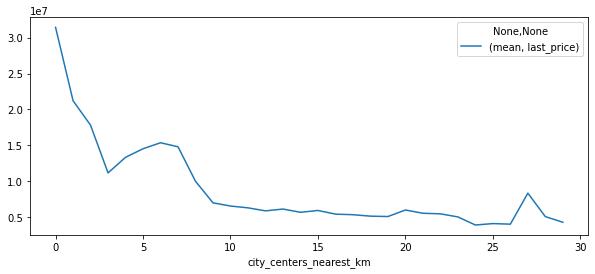

In [31]:
# Ранее мы считали расстояние до центра в километрах. Теперь посчитаем цену каждого километра в Санкт-Петербурге
data[data['locality_name']=='санкт-петербург'].pivot_table(index='city_centers_nearest_km', values=['last_price'], aggfunc=['mean']).plot(style='-', figsize=(10,4))

На графике видно, что средняя стоимость квартир падает при возрастании расстояния до центра. Также видны пики цен на удалении 6-7 км. от центра и 26-27 и резкий спад от 0 до 3 км.

### Общий вывод

 В данной работе были исследованы данные сервиса Яндекс Недвижимость — архива объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. 
 
 Выполнена предобработка данных. Пропущенные значения и аномалии были заменены там, где это представилось возможным. Были устранены дубликаты в названиях населенных пунктов. 
 
 Добавили в таблицу столбцы с такими данными, как: цена одного квадратного метра, день недели публикации объявления, месяц публикации объявления, год публикации объявления, тип этажа квартиры, расстояние до центра города в километрах. 
 
 Проведен исследовательский анализ таких данных, как : общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры, общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления. По каждому из этих параметров были построены и описаны гистограммы. В ходе анализа было установлено, что чаще всего встречаются объявления с:общей площадью 30-40 м.кв; с жилой площадью ~ 20 м.кв.; с площадью кухни 5-10 м.кв.; стоимостью в районе 4 млн.руб.; с количеством комнат от 1 до 3; с потолком 2.75 м.; на 5 этаже; с расположением ни на первом и ни на последнем этажах; в пятиэтажном доме; на расстоянии 12-15 км от центра, 12-25 от аэропорта и в радиусе километра до ближайшего парка (пиковое количество на расстоянии 500 метров). Чаще всего объявления выкладывались в будние дни и квартира продавалась примерно за 50 дней.  
 
 Также было изучено, как быстро продавались квартиры. Было изучено, как различные параметры влияют на стоимость квартиры. Рассматривались параметры : общая, жилая и площадь кухни; количество комнат; этаж расположения квартиры (первый, последний, другой); дата размещения (день недели, месяц, год). Так было выявлено, что есть практически прямая зависимость между ценой квартиры и общей площадью, жилой площадью, площадью кухни, количеством комнат и этажом расположения (первый, последний, другой). Цена слабо зависит или не зависит вообще от даты размещения объявления, но на графике зависимости от года виден спад цен до 2018 года и подъём с 2018 по 2019 годы. Можно было бы также рассотреть зависимость цены от длительности размещения объявления, потому что люди склонны уменьшать цену, если что-то долго не продается. Также можно было бы изучить зависимость цены от числа балконов, т.к. в маленькой и дешевой квартире, скорее всего, много их быть не может.
 
 Была посчитана средняя стоимость одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений и были выделены населенные пункты с наибольшей и наименьшей ценами. Такими населенными пунктами оказались соответственно Санкт-Петербург и Выборг.
 
 Также было определено, как на цену жилья в Санкт-Петербурге влияет то, насколько оно удалено от центра. При удалении от центра, цена снижается.